<a href="https://colab.research.google.com/github/axeaoey/227361-Quiz1/blob/main/TrafficJam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import files
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Upload the file to the Colab environment
uploaded = files.upload()

# Read the Excel file into a pandas DataFrame
data = pd.read_excel("traffic_Final.xlsx", engine="openpyxl")

# Rename the columns, removing leading/trailing spaces
data = data.rename(columns=lambda x: x.strip())

# Now you can continue with the rest of your code...
print("Columns in dataset:", list(data.columns))

Saving traffic_Final.xlsx to traffic_Final.xlsx
Columns in dataset: ['No', 'Weather', 'TimeOfWeek', 'TimeOfDay', 'Road', 'TrafficJam']


In [2]:
# 📌 เช็คชื่อคอลัมน์ที่เกี่ยวกับ Traffic
target_col = [col for col in data.columns if 'traffic' in col.lower()]
if len(target_col) == 0:
    raise ValueError("❌ ไม่พบคอลัมน์ TrafficJam ในไฟล์ Excel")
else:
    target_col = target_col[0]  # ใช้ชื่อคอลัมน์ที่เจอ

print(f"✅ ใช้คอลัมน์ '{target_col}' เป็น Target")

# 📌 ลบคอลัมน์ที่ไม่จำเป็น (No)
if 'No' in data.columns:
    data = data.drop(columns=['No'])

# 📌 จัดการค่าที่หายไป (NaN) โดยใช้ค่า mode ของแต่ละคอลัมน์
data.fillna(data.mode().iloc[0], inplace=True)

# 📌 แปลงค่าข้อความให้เป็นตัวเลข (Encoding Categorical Features)
label_encoders = {}
categorical_columns = ['Weather', 'TimeOfWeek', 'TimeOfDay', 'Road']

for col in categorical_columns:
    if col in data.columns:
        le = LabelEncoder()
        data[col] = le.fit_transform(data[col])
        label_encoders[col] = le  # เก็บ Encoder ไว้เผื่อใช้งานภายหลัง

# 📌 แยก Features และ Target
X = data.drop(columns=[target_col])
y = data[target_col]

✅ ใช้คอลัมน์ 'TrafficJam' เป็น Target


In [7]:
# 📌 ปรับค่าพารามิเตอร์ของ MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(128, 64, 32), activation='relu', solver='adam',
                    alpha=0.0001, max_iter=1000, random_state=42, tol=1e-4)

# 📌 เทรนโมเดล
mlp.fit(X_train, y_train)

# 📌 ทำนายผล
y_train_pred = mlp.predict(X_train)
y_test_pred = mlp.predict(X_test)

In [4]:
# 📌 คำนวณความแม่นยำ
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)
print(f"✅ Train Accuracy: {train_acc:.4f}")
print(f"✅ Test Accuracy: {test_acc:.4f}")

✅ Train Accuracy: 0.9737
✅ Test Accuracy: 0.6000


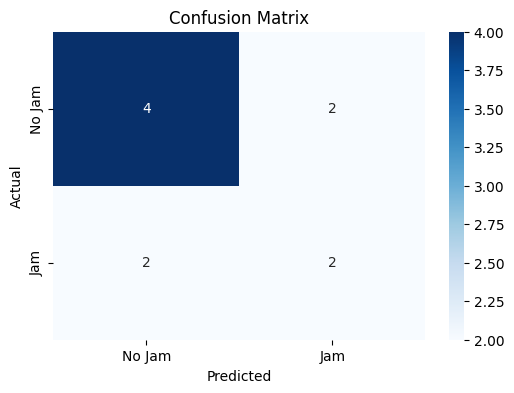

In [8]:
# 📌 แสดง Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Jam', 'Jam'], yticklabels=['No Jam', 'Jam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()